In [158]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt       # numpy, pandas, matplotlib are used for data manipulation
import seaborn as sns                # data visualization
from sklearn.feature_selection import SelectKBest, chi2    #Select Best features and score function
from sklearn.preprocessing import LabelEncoder             #Convert character into numeric
from sklearn.model_selection import train_test_split       #Divide data into training dataset and test dataset
from sklearn.linear_model import LogisticRegression        #Our model for prediction 
from sklearn.metrics import accuracy_score                 # Used for Check accuracy score

# Data Analysis

In [165]:
#Load dataset & see top 5th rows
data = pd.read_csv("breast_cancer.csv")
data.head()

In [166]:
# See quike statistical discription about data
data.describe()

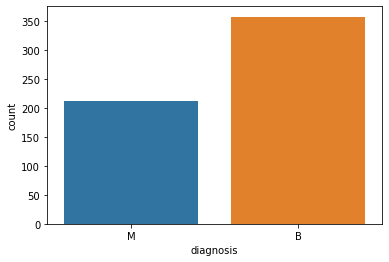

In [161]:
# seaborn library for visualization is used here for visualize Diagnosis in data
sns.countplot(x='diagnosis', data = data)

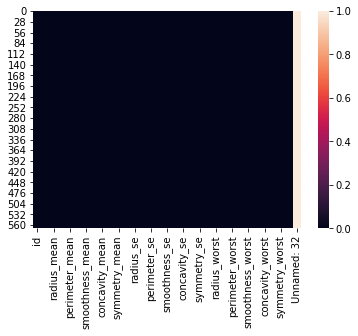

In [162]:
#Check how many columns contain null values
sns.heatmap(data.isnull())

# Data wrangling

In [163]:
#Remove those colmnns which conatin null and which are useless
data.drop(data.iloc[:,0:1,], axis = 1, inplace = True)
data.drop('Unnamed: 32', axis = 1, inplace = True)

# Train & test data

In [164]:
#Select training and testing data in X and Y variable by index's slicing
X = data.iloc[:, 1:]
Y = data.iloc[:, 0]

# Here select best variable which is increase our model accuracy
select = SelectKBest(score_func = chi2, k = 10).fit_transform(X, Y)
x_feature = pd.DataFrame(select)

# Here LabelEncoder is used for convert character into binary digit/numeric form
convert = LabelEncoder()
Y = convert.fit_transform(Y.astype('str'))

# Split data into training dataset & testing dataset
X_train, X_test, y_train, y_test = train_test_split(x_feature, Y, test_size = 0.2, shuffle = True)

# Train our model through train dataset & make prediction
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Check Accuracy score 
print("Accuracy : ",accuracy_score(y_test, y_pred) * 100)

Accuracy :  95.6140350877193


C:\Users\Gaurav kakran\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
